<a href="https://colab.research.google.com/github/nataliapuentesca-crypto/sistemas-avanzados-de-produccion/blob/main/Taller2_Bici_al_trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

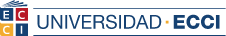
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [ ]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [ ]:
#librerias (numpy, mat...)

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()

# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

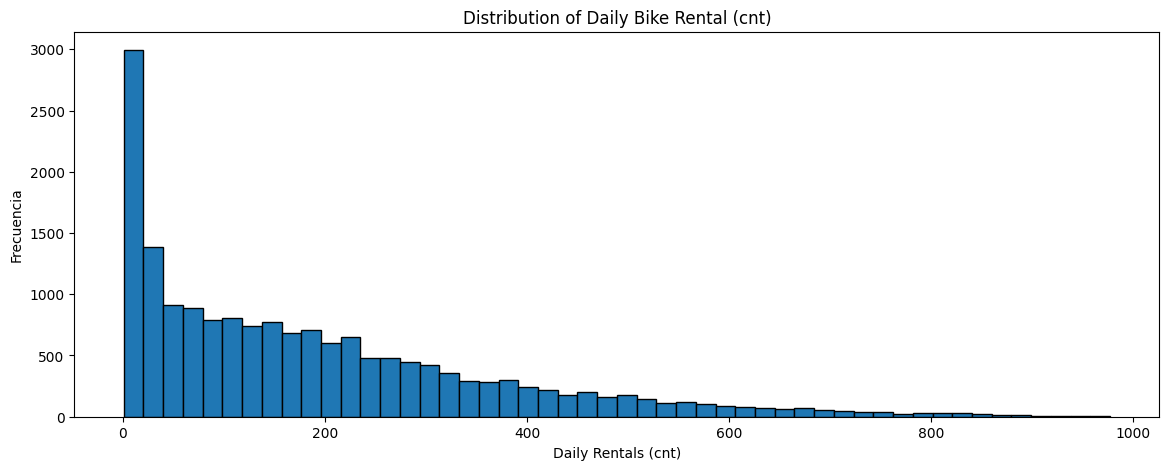

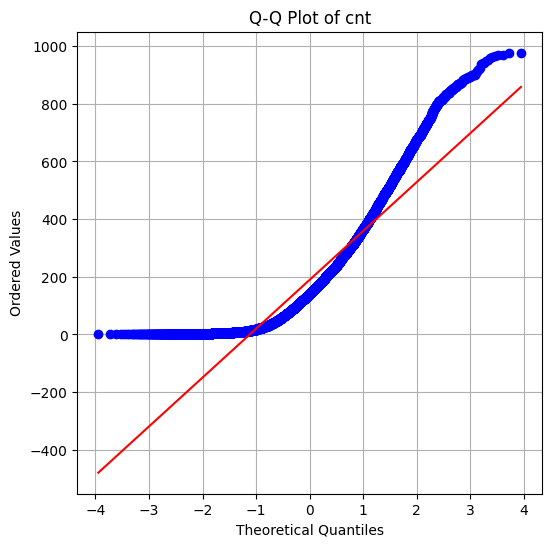

In [ ]:
# 1. Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
plt.figure(figsize=(14, 5))
plt.hist(df['cnt'], bins=50, edgecolor='black')
plt.title('Distribution of Daily Bike Rental (cnt)')
plt.xlabel('Daily Rentals (cnt)')
plt.ylabel('Frecuencia')
plt.show()
plt.figure(figsize=(6, 6))
stats.probplot(df['cnt'], dist='norm', plot=plt)
plt.title('Q-Q Plot of cnt')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()





### **Interpretación pregunta 1**

1. Histograma de cnt

Se importa la librería matplotlib y se crea una figura de tamaño amplio (figsize=(14,5)).

Se grafica un histograma de los valores de cnt con 50 barras (bins=50) y borde negro.

El histograma muestra la distribución de frecuencias de los alquileres diarios.

Sirve para observar si la distribución tiene forma de campana (similar a la normal) o si presenta asimetría, colas largas o valores atípicos.

 2. Gráfico Q-Q (Quantile-Quantile Plot)

Se crea una figura más pequeña (figsize=(6,6)).

Se utiliza la función stats.probplot de scipy con la distribución teórica norm (normal estándar).

Este gráfico compara los cuantiles teóricos de una distribución normal contra los cuantiles observados de cnt.

Si los puntos caen aproximadamente sobre la línea diagonal, significa que los datos siguen una distribución aproximadamente normal.

Si los puntos se desvían mucho de la recta (especialmente en las colas), significa que la variable no es normal.

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [ ]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']

# Calcular la correlación de Pearson
pearson_corr = df[columnas_relacion].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)

# Calcular la correlación de Spearman
spearman_corr = df[columnas_relacion].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

Pearson Correlation Matrix:
                cnt      temp       hum  windspeed
cnt        1.000000  0.404772 -0.322911   0.093234
temp       0.404772  1.000000 -0.069881  -0.023125
hum       -0.322911 -0.069881  1.000000  -0.290105
windspeed  0.093234 -0.023125 -0.290105   1.000000

Spearman Correlation Matrix:
                cnt      temp       hum  windspeed
cnt        1.000000  0.423330 -0.359614   0.126629
temp       0.423330  1.000000 -0.055408  -0.009719
hum       -0.359614 -0.055408  1.000000  -0.293913
windspeed  0.126629 -0.009719 -0.293913   1.000000


### **Interpretación pregunta 2**

Correlación de Pearson

Se usa con method='pearson'.

Mide la relación lineal entre dos variables (qué tan cerca están de una recta).

Valores cercanos a +1 indican una relación lineal positiva fuerte, valores cercanos a -1 indican una relación negativa fuerte y valores cercanos a 0 indican ausencia de relación lineal.

En la matriz observada:

- cnt y temp: 0.4047 → relación lineal positiva moderada (a mayor temperatura, más alquileres).

- cnt y hum: -0.3229 → relación lineal negativa moderada (a mayor humedad, menos alquileres).

- cnt y windspeed: 0.0932 → relación muy débil, casi nula.

 2. Correlación de Spearman

- Se usa con method='spearman'.

- Evalúa si la relación entre variables es monótona (creciente o decreciente), no necesariamente lineal.

- Se basa en el orden de los datos, no en los valores exactos.

En la matriz observada:

cnt y temp: 0.4333 → relación monótona positiva, un poco más fuerte que la de Pearson.

cnt y hum: -0.3591 → relación monótona negativa moderada.

cnt y windspeed: 0.1266 → relación muy débil, pero algo mayor que en Pearson.

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

El Teorema Central del Límite (TLC) establece que, independientemente de la distribución de la población, la distribución de la media muestral tiende a ser normal cuando el tamaño de la muestra es suficientemente grande. Esto es relevante para justificar el uso de intervalos y pruebas basadas en la normalidad para la media de cnt.

Respuesta general sobre el tamaño muestral:

- Regla general: Para poblaciones que no son extremadamente sesgadas o que no tienen distribuciones muy atípicas, se considera que n ≥ 30 es un tamaño muestral suficiente para aplicar el TLC y asumir que la distribución de la media es aproximadamente normal.

- Poblaciones sesgadas o con colas pesadas: Si la distribución de cnt es muy sesgada o tiene colas pesadas (por ejemplo, distribuciones tipo exponencial o lognormal), es recomendable usar tamaños muestrales mayores. En estos casos, algunos sugieren que n ≥ 50 o incluso n ≥ 100 sería más adecuado para que el TLC sea aplicable de forma confiable.

¿Por qué n ≥ 30 es el umbral comúnmente aceptado?

- El número 30 se ha convertido en un valor comúnmente utilizado debido a que el TLC muestra que, a medida que el tamaño muestral aumenta, la distribución de la media muestral se aproxima más a una distribución normal. Esto se puede verificar a través de la visualización de histogramas o gráficos Q-Q, pero el valor de 30 es una regla empírica de conveniencia.

Qué hacer si el tamaño muestral es pequeño:

- Si tienes una muestra pequeña (n < 30), y no puedes asumir que la población tiene una distribución aproximadamente normal, entonces lo ideal sería realizar pruebas de normalidad, como:

Shapiro-Wilk: Para muestras pequeñas.

- Kolmogorov-Smirnov: Para determinar si la muestra se ajusta a una distribución normal.

- Si la muestra es pequeña y no se puede asumir normalidad, se pueden usar métodos no paramétricos (como la prueba de Mann-Whitney o pruebas basadas en rangos), que no requieren suposiciones de normalidad.

Para n ≥ 30, puedes aplicar intervalos de confianza y pruebas de hipótesis basados en la normalidad de la media, gracias al TLC.

Si n < 30 y la distribución no parece ser normal, deberías considerar realizar una prueba de normalidad o recurrir a métodos no paramétricos.

### **Respuesta pregunta 3**


## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [ ]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']

# Valor de referencia para la prueba
valor_hipotesis = 4500

#realizar el test de hipotesis de una muestra

statics, p_value = stats.ttest_1samp(cnt_laborales, valor_hipotesis)

print(f"Test Statics: {statics}")
print(f"P-value: {p_value}")

#regla de decision

alpha = 0.05
if p_value < alpha:
    print("Rechazar la hipótesis nula, porque se tiene evidencia estadistica, La media de la demanda es significativamente diferente de 4500")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para concluir que la media de cnt sea siguiente")

#PRUEBAS DE HIPOTESIS - LEER SEMANA 4


Test Statics: -2534.333902273014
P-value: 0.0
Rechazar la hipótesis nula, porque se tiene evidencia estadistica, La media de la demanda es significativamente diferente de 4500


### **Interpretación pregunta 4**

# 1. Selección de los datos
cnt_laborales = df[df['workingday'] == 1]['cnt']

- Aquí se filtran los datos de la columna cnt únicamente para los días laborales. Estos valores son la muestra sobre la que se va a trabajar.

 # 2. Planteamiento de la hipótesis

- Hipótesis nula (H₀): μ = 4500
La media de cnt en días laborales es igual a 4500.

- Hipótesis alternativa (H₁): μ ≠ 4500
La media de cnt en días laborales es diferente de 4500.

- Nota: El código que tienes implementa una prueba bilateral (dos colas), no una unilateral (≥ 4500).

 # 3. Test estadístico
statics, p_value = stats.ttest_1samp(cnt_laborales, valor_hipotesis)

- Se aplica un t-test de una muestra comparando la media de los cnt_laborales contra el valor de referencia 4500.

- Estadístico t = -2534.33
- Esto indica cuántas desviaciones estándar está la media observada de la media hipotética (4500). El valor tan grande y negativo sugiere que la media real es mucho menor que 4500.

- p-value = 0.0
- El valor p es prácticamente cero, lo que significa que la probabilidad de observar un resultado así si H₀ fuera cierta es despreciable.

 # 4. Regla de decisión
- alpha = 0.05
- if p_value < alpha:
    print("Rechazar la hipótesis nula...")
- else:
    print("No se puede rechazar la hipótesis nula...")


- Con un nivel de significancia α = 0.05:

- Como p-value = 0 < 0.05, se rechaza H₀.

 5. Interpretación del resultado

El resultado final fue:

#Test Statics: -2534.333902273014
#P-value: 0.0
#Rechazar la hipótesis nula, porque se tiene evidencia estadística,
#la media de la demanda es significativamente diferente de 4500



## **PREGUNTA 5**
¿Cuál es un IC (Intervalo de confianza) bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

In [ ]:
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
medians = []

print(sample_size)

#remuestreo

for _ in range(n_iterations):
    bootstrap_sample = df['cnt'].sample(n=sample_size, replace=True)
    bootstrap_median = bootstrap_sample.median()
    medians.append(bootstrap_median)

17379


Interpretación pregunta 5